In [1]:
#引入所需要的全部的包
import sklearn
from sklearn.model_selection import train_test_split #样本划分
from sklearn.linear_model import LinearRegression, Lasso,Ridge #线性回归的三个模型
from sklearn.preprocessing import StandardScaler # 标准化
from sklearn.model_selection import GridSearchCV #交叉验证
from sklearn.preprocessing import PolynomialFeatures # 多项式扩展
from sklearn.pipeline import Pipeline  #管道操作

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd
import time

In [2]:
## 创建一个时间序列字符串格式化字符串
def date_format(dt):
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

In [3]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [9]:
# 加载数据
path = 'datas\household_power_consumption.txt' ## 全部数据
path = 'datas\household_power_consumption_200.txt' ## 200行数据
path = 'datas\household_power_consumption_1000.txt' ## 1000行数据
df = pd.read_csv(path, sep=';', low_memory=False)

# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
names2=df.columns
names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# 异常数据处理(异常数据过滤)
new_df = df.replace('?', np.nan)
datas = new_df.dropna(axis=0,how = 'any') # 只要有数据为空，就进行删除操作

准确率: 0.48506578175142046


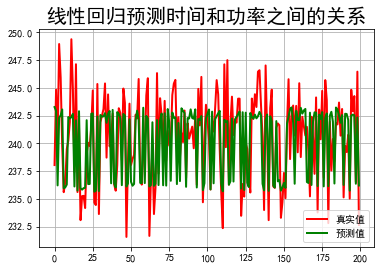

In [18]:
## 时间和电压之间的关系(Linear)--------------这一段是最简单的线性回归的代码
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]] # 获取第1列和第2列
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]].values #获取第4列 电压的值

# 对数据集进行测试集合训练集划分 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

# 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ## 训练模型

# 模型校验 ---对测试集进行测试
y_predict = lr.predict(X_test) ## 预测结果

# 模型效果
print("准确率:",lr.score(X_test, Y_test))

## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')
plt.plot(t, Y_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测时间和功率之间的关系", fontsize=20)
plt.grid(b=True)#网格
plt.show()


1阶，系数为： [ 2.39926650e+02  0.00000000e+00 -8.88178420e-16  3.97781449e+00
  8.73334650e-01  1.70647992e-01  0.00000000e+00]
score: 0.48506578175142157
2阶，系数为： [ 1.59188675e+13  5.85937500e-03  9.76562500e-04 -6.41429579e+12
  2.94904115e+00  2.72842706e-01 -2.44140625e-03  6.34765625e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.59188675e+13 -2.50336914e+01
 -5.13595581e-01  0.00000000e+00 -1.02597656e+01 -4.63867188e-01
  0.00000000e+00 -3.12500000e-02  0.00000000e+00  0.00000000e+00]
score: 0.7417630335146814
3阶，系数为： [-3.11343384e+11  2.30752996e+10  4.98400067e+09  9.94110274e+11
 -9.45232732e+11 -1.17274372e+10 -9.69571967e+08 -1.87398051e+09
 -4.71204658e+09  1.54987911e+09  2.81495233e+09 -8.10785232e+08
  1.22155661e+08  1.34524651e+09  7.12177174e+07  4.63957501e+08
 -7.97271729e-04  0.00000000e+00 -3.86710372e+10  3.80868948e+11
  4.72541474e+09  0.0000000

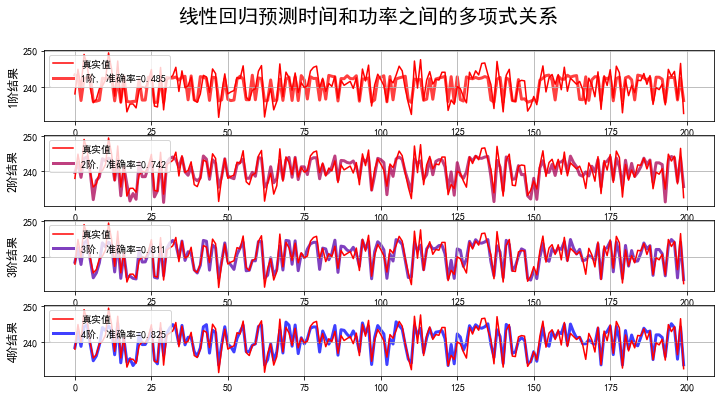

In [33]:
## 时间和电压之间的关系(Linear-多项式)
models = [
    Pipeline([
        ('Poly', PolynomialFeatures()), #给定多项式扩展操作，后面会传参
        ('Linear', LinearRegression(fit_intercept=False))
    ])
]
model = models[0] #获取list中的第一个元素
# 获取x和y变量, 并将时间转换为数值型连续变量
X = datas[names[0:2]] # 获取第1列和第2列
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]].values #获取第4列 电压的值

# 对数据集进行测试集合训练集划分
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

#模型训练
t = np.arange(len(X_test)) #获取numpy中的 array
N = 5 
d_pool = np.arange(1, N, 1)
m = d_pool.size
clrs = [] #颜色
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' % int(c)) #获取4中颜色
line_width = 3

plt.figure(figsize=(12,6), facecolor='w')#创建一个绘图窗口，设置大小，设置颜色
for i,d in enumerate(d_pool):
    plt.subplot(N-1, 1, i+1) #设置子图位置（序号）
    plt.plot(t, Y_test, 'r-', label=u'真实值', ms=10, zorder=N)
    model.set_params(Poly__degree=d) #设置多项式的阶乘  注意Pipline中设置参数的方法
    model.fit(X_train, Y_train)  #用model来设置值
    lin = model.get_params('Linear')['Linear'] #获取Pipleline中的一个子模型的一个操作函数
    output = u'%d阶，系数为：'%d
    
    #判断操作函数中是否有属性
    if hasattr(lin, 'alpha_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'alpha=%.6f, ' % lin.alpha_) + output[idx:]
    if hasattr(lin, 'l1_ratio_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'l1_ratio=%.6f, ' % lin.l1_ratio_) + output[idx:]
    print (output, lin.coef_.ravel())
    
    #对模型进行预测
    y_hat = model.predict(X_test)
    s = model.score(X_test, Y_test) # s 就是一个（0，1）之间的小数
    
#     print('score:',s)
    
    z = N - 1 if (d == 2) else 0
    label = u'%d阶, 准确率=%.3f' % (d,s)
    plt.plot(t, y_hat, color=clrs[i], lw=line_width, alpha=0.75, label=label, zorder=z)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)

## 预测值和实际值画图比较
plt.suptitle(u"线性回归预测时间和功率之间的多项式关系", fontsize=20)
plt.grid(b=True)
plt.show()
    

In [34]:
# 参数说明

## sklearn.model_selection.train_test_split(*arrays, **options) ---做样本分割
### 参数：
#### 数据参数：第一个参数是X，第二个参数Y；
#### test_size：进行数据划分的时候，测试集占用的比例
#### train_size：进行数据划分的时候，训练集占用的比例
#### 要求test_size和train_size只能给定一个
#### random_state: 随机数种子，所有的随机数种子如果给定的时候都是为了保证多次操作的结果是完全一致的，默认情况下随机数种子是当前的时间，


## class sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)---多项式扩展
### 参数
#### degree：给定进行最高多少次幂的扩展，默认为2
#### interaction_only ：默认值为False, 在多项式中，是否考虑同一个特征的多次相乘，是否扩展x1^2或者x1*x2^2;默认为False,表示扩展，True表示不扩展
#### include_bias：默认值为True, 是否在多项式扩展中加入一个常数项，常数项值为1，默认加入


## LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)----线性回归

### 参数：
#### fit_intercept：截距，就是拟合函数的常数项，默认为True，表示存在截距项,False就把截距值设置为0
#### normalize:是否规范化，不要动这个参数
#### copy_X:在原来的数据行进行训练
### 属性：
#### coef_:模型训练好后的参数列表
#### intercept_ : 截距值
## StandardScaler
### 参数
#### with_mean：在进行数据转换的过程中，是否将数据转换为均值为0的数据（默认为True，表示转换）
#### with_std：在进行数据转换的过程中，是否将数据转换为标准差为1的数据（默认为False,表示转换）
### 属性
#### mean_：均值
#### var_：方差